# User requirements Research

### Research Question

1.Which businesses are getting top/negative reviews?

2.Which categories of business are getting top/negative reviews?

3.What are the keywords/frequent of top/negative reviewed businesses from users?

4.What are the most frequent words from users reviews system?

4.What are the relationship between rating scores，price, review count?

### Purpose 

1.Understand current small business in Portland.

2.Understand socail demand and expect for different categories of small business in different location.

3.Understand users requirements for small business quality.

4.Provide business owners a reference and comparison to choose location and predict their development plan.

## 1.Data Collecting

### 1.1 Download Yelp business review datasets using API

In [331]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import fiona
import descartes
from shapely.geometry import Point, Polygon
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import copy
%matplotlib inline

In [289]:
#Porland Zipcode
zipcode=[97201, 97202,97203, 97204, 97205, 97206, 97209, 97210,97211, 97212, 97213, 97214, 97215, 97216,97217, 97218, 97219, 97220, 97221, 97222, 97223, 97225, 97227, 97229, 97230, 97231, 97232, 
97233, 97236, 97239, 97258, 97266]


In [291]:
HEADERS={'Authorization':'Bearer %s' % api_key}
ENDPOINT='https://api.yelp.com/v3/businesses/search'

In [366]:
json_total = []
for i in zipcode:
    PARAMETERS={'limit':50,
                'radius':1000,
                'offset':50,
                'location':'Porland, OR, %d' % i}
    json_total.append(requests.get(url=ENDPOINT,params=PARAMETERS,headers=HEADERS))

In [374]:
json_total[11].json()

{'businesses': [{'id': 'WWlkufMDXMmgOjnD_s1Wfg',
   'alias': 'the-matador-portland-6',
   'name': 'The Matador',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/q2msY8GdDIm_SVJIMFK3eg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/the-matador-portland-6?adjust_creative=AnQ2M6CayEhzVZeGE7wtcA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=AnQ2M6CayEhzVZeGE7wtcA',
   'review_count': 444,
   'categories': [{'alias': 'mexican', 'title': 'Mexican'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 3.5,
   'coordinates': {'latitude': 45.5226289, 'longitude': -122.6408777},
   'transactions': ['delivery'],
   'price': '$$',
   'location': {'address1': '2424 E Burnside St',
    'address2': '',
    'address3': '',
    'city': 'Portland',
    'zip_code': '97214',
    'country': 'US',
    'state': 'OR',
    'display_address': ['2424 E Burnside St', 'Portland, OR 97214']},
   'phone': '+15037195757',
   'display_phone': '(50

In [375]:
df_total=[]

for j in range(len(json_total)):
    data=json_total[j].json()
    
    rating=[]
    latitude=[]
    longitude=[]
    zip_code=[]
    name=[]
    review_count=[]
    ID=[]
    price=[]
    categories=[]
    
    for i in range(len(data['businesses'])):
        ID+=[data['businesses'][i]['id']]
        latitude+=[data['businesses'][i]['coordinates']['latitude']]
        longitude+=[data['businesses'][i]['coordinates']['longitude']]
        zip_code+=[data['businesses'][i]['location']['zip_code']]
        rating+=[data['businesses'][i]['rating']]
        name+=[data['businesses'][i]['name']]
        review_count+=[data['businesses'][i]['review_count']]
        categories+=[data['businesses'][i]['categories'][0]['title']]
    
    df_total.append(pd.DataFrame({'Business_id':ID,
              'categories':categories,
              'rating':rating,
              'latitude':latitude, 
              'longitude':longitude,
              'zipcode':zip_code,
              'review_count':review_count},index=name))     


In [380]:
# Bussiness Review information in Portland
business= pd.concat(df_total)
business

,Business_id,categories,rating,latitude,longitude,zipcode,review_count
Pizza Schmizza Pub & Grub,Uo6k2_14sdUhVJF9YxnMcg,Pizza,3.5,45.511364,-122.680686,97201,160.0
Barlow,i5h9wem0wCJO6cvBJ5lP7w,Cocktail Bars,4.0,45.517730,-122.681280,97205,262.0
Alecocina,DjRlz2unXeiOdKqSGvjriw,Food Trucks,5.0,45.509532,-122.680704,97201,18.0
City of Portland,cnUPtxp4LP70yFuupy1E_w,Local Flavor,4.0,45.515030,-122.679141,97204,152.0
Keller Fountain Park,VA8xfXToZfpg3YeNWyc5pA,Parks,4.0,45.512764,-122.679104,97201,76.0
veggie bowl,sNc2RO0QKitsxiKm1ZGewA,Vegetarian,5.0,45.509581,-122.681607,97201,18.0
Pastini,fCS9tmNTZzwEfC-wp1MhBw,Italian,4.0,45.518700,-122.682030,97205,377.0
Addy's Sandwich Bar,OMs_pvRY30JJqo0UJRpq1Q,Sandwiches,4.5,45.518379,-122.683220,97205,155.0
MOD Pizza,bL8RqB4mJvJaVquEV3yeMw,Pizza,4.5,45.517281,-122.675114,97204,165.0
Sumo Sushi,Eemx8R6O6c2XZBapH_fa9w,Food Trucks,4.5,45.512111,-122.686309,97201,60.0


In [424]:
business.to_csv('business.csv')

### 1.2 Good/Negative Reviewed small business

In [534]:
rating_good=business[business['rating']>4.0]
rating_good

,Business_id,categories,rating,latitude,longitude,zipcode,review_count
Alecocina,DjRlz2unXeiOdKqSGvjriw,Food Trucks,5.0,45.509532,-122.680704,97201,18.0
veggie bowl,sNc2RO0QKitsxiKm1ZGewA,Vegetarian,5.0,45.509581,-122.681607,97201,18.0
Addy's Sandwich Bar,OMs_pvRY30JJqo0UJRpq1Q,Sandwiches,4.5,45.518379,-122.683220,97205,155.0
MOD Pizza,bL8RqB4mJvJaVquEV3yeMw,Pizza,4.5,45.517281,-122.675114,97204,165.0
Sumo Sushi,Eemx8R6O6c2XZBapH_fa9w,Food Trucks,4.5,45.512111,-122.686309,97201,60.0
Mill Ends Park,BgmaGvYHupHJv3UKAovI1w,Landmarks & Historical Buildings,4.5,45.516202,-122.673247,97204,78.0
Third Wave Coffee Tours,Md54AD4blgW1OZBaY2l22g,Coffee & Tea,5.0,45.518150,-122.674156,97204,37.0
Café Ponté,y4wbm5Si8r19NuUfz5NB3g,Coffee & Tea,4.5,45.517061,-122.672877,97204,66.0
Karam Restaurant & Bar,qkTSxqS0vdT_rNK08VkmBw,Lebanese,4.5,45.516610,-122.685710,97205,58.0
Plaza Deli,MAnjcQDE-CMTmtD6I8qJGQ,Delis,4.5,45.513158,-122.675127,97258,38.0


In [386]:
rating_bad=business[business['rating']<3.5]
rating_bad

,Business_id,categories,rating,latitude,longitude,zipcode,review_count
McCormick & Schmick's Harborside at the Marina,7EbGTD7ZF30vEFBiHyN_0A,Seafood,3.0,45.509404,-122.673329,97201,548.0
The Melting Pot,OXlBRSYjypwu1f5Rwpl9sQ,Fondue,3.0,45.516556,-122.679433,97204,423.0
Cheerful Tortoise,qY5A0DAhBYe7y9WAQVyLug,Sports Bars,3.0,45.509960,-122.683850,97201,198.0
Headwaters,1iU41Mf9FGZACZZmdaemaw,Seafood,3.0,45.517139,-122.681119,97205,307.0
Santa Fe Taqueria,xLK-nQFpe0uxdGMlmZZqJg,Mexican,3.0,45.528919,-122.698806,97210,283.0
Bunk - Alberta,D5nRw9yjqc72BUjA3sR0aA,Breakfast & Brunch,3.0,45.559084,-122.644463,97211,154.0
Alleyway Cafe & Bar,MZRcdgiVUmUp14GF6hCbRA,Bars,3.0,45.559240,-122.640530,97211,99.0
Teote Mezcalería,itDQQBztG5kem20X3G51FQ,Latin American,3.0,45.558820,-122.637620,97211,71.0
Le Tap,wltCnaLr6-HZlitQh09uRQ,Beer Gardens,3.0,45.559312,-122.640673,97211,10.0
7-Eleven,-NbWINJ_hiBbZYZ2VJbJEA,Convenience Stores,3.0,45.562520,-122.649310,97211,6.0


In [425]:
rating_bad.to_csv('rating_bad.csv')
rating_good.to_csv('rating_good.csv')

### 1.3 Using API to get user reviews datasets

In [535]:
review_good=[]
for i in rating_good['Business_id']:
    HEADERS={'Authorization':'Bearer %s' % api_key}
    ENDPOINT='https://api.yelp.com/v3/businesses/%s/reviews' % i
    review_good.append(requests.get(url=ENDPOINT,headers=HEADERS))

In [403]:
review_good[31].json()

{'reviews': [{'id': 'J1MsWKLs-Je6LbZFnbjWJQ',
   'url': 'https://www.yelp.com/biz/third-wave-coffee-tours-portland?adjust_creative=AnQ2M6CayEhzVZeGE7wtcA&hrid=J1MsWKLs-Je6LbZFnbjWJQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=AnQ2M6CayEhzVZeGE7wtcA',
   'text': 'This was really fun. We met in the morning in a coffee shop that has wonderful coffee (of course) and food; I arrived a little early and had a sweet...',
   'rating': 5,
   'time_created': '2019-10-22 12:11:20',
   'user': {'id': '1_UyXC35BjnPmFX1EwZOfQ',
    'profile_url': 'https://www.yelp.com/user_details?userid=1_UyXC35BjnPmFX1EwZOfQ',
    'image_url': None,
    'name': 'Karen L.'}},
  {'id': 'U458qmQolB3zA0PHAa-h0w',
   'url': 'https://www.yelp.com/biz/third-wave-coffee-tours-portland?adjust_creative=AnQ2M6CayEhzVZeGE7wtcA&hrid=U458qmQolB3zA0PHAa-h0w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=AnQ2M6CayEhzVZeGE7wtcA',
   'text': 'This is an absolute MUST do for coffee d

In [536]:
Rgood=[]

for j in range(len(review_good)):
    data=review_good[j].json()
    
    rating=[]
    text=[]
    time=[]
    Review_ID=[]
    
    for i in range(len(data['reviews'])):

        Review_ID+=[data['reviews'][i]['id']]
        text+=[data['reviews'][i]['text']]
        time+=[data['reviews'][i]['time_created']]
        rating+=[data['reviews'][i]['rating']]
    
    Rgood.append(pd.DataFrame({'Review_ID':Review_ID,
              'text':text,
              'rating':rating,
              'time':time}))  
    
for i in range(len(rating_good)):
    Rgood[i]['Business_ID']=rating_good['Business_id'][i]
    
Review_good= pd.concat(Rgood)
Review_good

,Review_ID,text,rating,time,Business_ID
0,Y5hj_gjEBcddiHfqb2BEpQ,Those in the know seem to favor the empanadas....,3,2019-03-12 17:38:40,DjRlz2unXeiOdKqSGvjriw
1,H9JKTqQPT5DWdf6y3eOfGQ,Best alfajores ever Ale Cocina is a high quali...,5,2020-01-07 22:57:30,DjRlz2unXeiOdKqSGvjriw
2,DDPeScunqXzv4a5UdJ9slQ,I'm Argentine for a moment\nCaught in-between ...,5,2018-07-11 17:45:48,DjRlz2unXeiOdKqSGvjriw
0,b5Q2xQoqHJjsbj_vlJODeg,This food cart is friggin' awesome. The food i...,5,2020-01-18 11:53:15,sNc2RO0QKitsxiKm1ZGewA
1,e8BUJElNdr7RaDA5QVXz5w,I came to Veggie Bowl last week to pick up foo...,5,2019-12-18 12:47:00,sNc2RO0QKitsxiKm1ZGewA
2,0THkfYdNHmguYEVcWPHl4g,Amazing food! You HAVE to have the soy curls w...,5,2020-04-07 14:08:35,sNc2RO0QKitsxiKm1ZGewA
0,ldcNxZcksXVCck1i__0gUw,This is my go to lunch place and has been for ...,5,2020-04-06 12:09:01,OMs_pvRY30JJqo0UJRpq1Q
1,3NtFNSoalvEYU37VDJG_nw,I've wanted to visit Addy's Sandwich Bar for w...,4,2019-10-17 10:44:38,OMs_pvRY30JJqo0UJRpq1Q
2,oVJVLuk20idBvCtrv_5TIw,Randomly stopped in during a whirlwind family ...,5,2019-04-05 11:35:36,OMs_pvRY30JJqo0UJRpq1Q
0,a1p3kwSfN3GXjlW1ZkZunQ,I always wanted to try MOD near home....I fina...,5,2019-11-22 09:24:32,bL8RqB4mJvJaVquEV3yeMw


### Get Bad Reviews Text

In [416]:
review_bad=[]
for i in rating_bad['Business_id']:
    HEADERS={'Authorization':'Bearer %s' % api_key}
    ENDPOINT='https://api.yelp.com/v3/businesses/%s/reviews' % i
    review_bad.append(requests.get(url=ENDPOINT,headers=HEADERS))

In [419]:
Rbad=[]

for j in range(len(review_bad)):
    data=review_bad[j].json()
    
    rating=[]
    text=[]
    time=[]
    Review_ID=[]
    
    for i in range(len(data['reviews'])):

        Review_ID+=[data['reviews'][i]['id']]
        text+=[data['reviews'][i]['text']]
        time+=[data['reviews'][i]['time_created']]
        rating+=[data['reviews'][i]['rating']]
    
    Rbad.append(pd.DataFrame({'Review_ID':Review_ID,
              'text':text,
              'rating':rating,
              'time':time}))   
    
    
for i in range(len(rating_bad)):
    Rbad[i]['Business_ID']=rating_bad['Business_id'][i]
    
Review_bad= pd.concat(Rbad)
Review_bad

,Review_ID,text,rating,time,Business_ID
0,EM8oNHdTvxW1P9XcmSg_Bg,Our family dined here the other night to celeb...,5,2019-12-12 11:06:45,7EbGTD7ZF30vEFBiHyN_0A
1,ee2lZwSNTsA1HAyx9b7sYQ,I've been here a few times for happy hour. The...,4,2020-03-28 19:58:10,7EbGTD7ZF30vEFBiHyN_0A
2,EGI6_E-JhhScQbfiYw3QuA,I typically really like McCormick and Schmick'...,3,2020-04-04 18:58:45,7EbGTD7ZF30vEFBiHyN_0A
0,6LtgXKEmAbwA8_owD7NzQg,We had a great time. We had a party of 6 and t...,5,2019-12-08 07:42:35,OXlBRSYjypwu1f5Rwpl9sQ
1,9KHRkD7_PHCdvPTDREL3UA,Let me explain why this location gets 3 stars....,3,2019-12-30 10:28:32,OXlBRSYjypwu1f5Rwpl9sQ
2,7Ekd1PYNV8ozjKjFNquHOA,We went to the Melting Pot for the third and f...,1,2019-10-18 07:09:05,OXlBRSYjypwu1f5Rwpl9sQ
0,vEkkWwzbdpkLMttyqWG_hw,"Went here with my work bestie, the service was...",4,2019-11-25 20:26:11,qY5A0DAhBYe7y9WAQVyLug
1,VxVH4xjpiDPWxMejyfp4cA,Last Thursday night my husband and I stopped i...,1,2019-11-23 15:42:06,qY5A0DAhBYe7y9WAQVyLug
2,oL0qS8Auz4Y3hYF88kx1LA,Yesterday my husband and I came here to use ou...,5,2019-11-25 13:31:58,qY5A0DAhBYe7y9WAQVyLug
0,29G4Ei4xZZXnk6-t1Ndvfw,I've eaten in the dining room and Happy Hour i...,4,2020-01-10 08:28:59,1iU41Mf9FGZACZZmdaemaw


In [540]:
Review_bad.to_csv('Review_bad.csv')
Review_good.to_csv('Review_good.csv')

## 2.Data Processing

In [480]:
import nltk
import string
import nltk.stem
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk.stem
from PIL import Image
import sys
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/yanxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [481]:
def preprocess_data(data):
    # This function should return a list of lists of preprocessed tokens for each message
    preprocessed_text=[]
    for i in data:
        words = nltk.word_tokenize(i)
        words = [word.lower() for word in words if word.isalpha()] #clean punctuation 
        words = [word.lower() for word in words if re.match('^[a-zA-Z]+', word)]  
        filtered_words = [word for word in words if word not in stopwords.words('english')] # clean stopwords
        s = nltk.stem.SnowballStemmer('english')  #
        cleaned_words = [s.stem(word) for word in words]
        preprocessed_text.append(cleaned_words)
        
    return preprocessed_text

In [537]:
good_text = Review_good.loc[:,'text']
bad_text = Review_bad.loc[:,'text']

good_sen = preprocess_data(good_text)
bad_sen= preprocess_data(bad_text)

### 2.1Good/Negative Reviewed small business

In [538]:
good_token = []
for i in range(len(good_sen)):
    token = " ".join(good_sen[i])
    good_token.append(token)
good_token=' '.join(good_token)

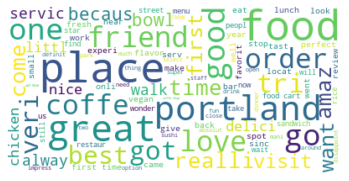

In [539]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(good_token)

# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [532]:
bad_token = []
for i in range(len(bad_sen)):
    token = " ".join(bad_sen[i])
    bad_token.append(token)
bad_token=' '.join(bad_token)

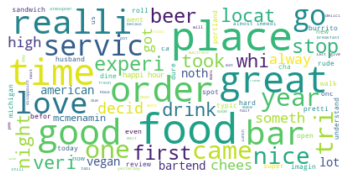

In [533]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(bad_token)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2.2 Get the most frequent words of Good/Negative Reviewed business

### 2.2 Get the most frequent words of all reviewed business in City of Portland

### 2.3 sentiment analysis about user reviews

## 3.Data Analysis and Visualization

### 3.1 Map the small business in Portland with different review rating scores

### 3.2 Explore relationship between rating scores，price, review count